In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
from tkinter import filedialog
import cv2

 # dataset path

In [2]:
data_dir = r"C:\Users\sivar\Downloads\archive\tea sickness dataset"

# Image preprocessing and augmentation with validation split

In [3]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=20, 
                             width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_generator = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=32, 
                                              class_mode='categorical', subset='training')
valid_generator = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=32, 
                                              class_mode='categorical', subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [4]:
class_labels = list(train_generator.class_indices.keys())
class_labels

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

# Build the CNN model

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

C:\Users\sivar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model

In [8]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=20, callbacks=[early_stopping])

C:\Users\sivar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step - accuracy: 0.1544 - loss: 2.3462 - val_accuracy: 0.3621 - val_loss: 1.5235
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.3154 - loss: 1.4857 - val_accuracy: 0.3621 - val_loss: 1.3031
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.4195 - loss: 1.2422 - val_accuracy: 0.4713 - val_loss: 1.1983
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.4120 - loss: 1.2323 - val_accuracy: 0.4253 - val_loss: 1.3551
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.4491 - loss: 1.1782 - val_accuracy: 0.4138 - val_loss: 1.1953
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.5050 - loss: 1.0342 - val_accuracy: 0.4425 - val_loss: 1.3209
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.4286 - loss: 1.2055 - val_accuracy: 0.5000 - val_loss: 1.0741
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.5346 - loss: 1.0275 - val_accuracy: 0.5920 - v

# Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(valid_generator)
print(f"Test Accuracy: {test_acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5625 - loss: 0.9376
Test Accuracy: 0.56


# Plot training results

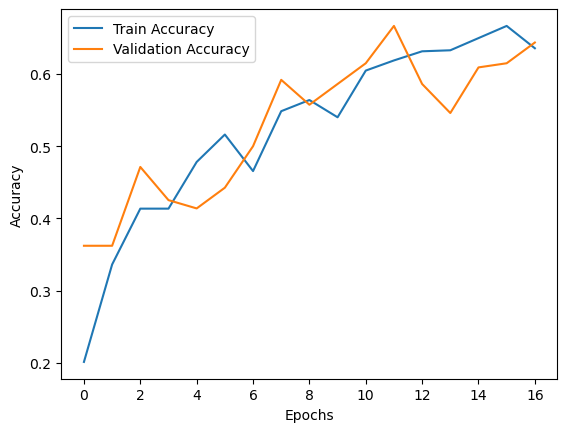

In [10]:
# Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model

In [11]:
model.save("tea_leaf_disease_model.h5")

In [12]:
model = load_model("tea_leaf_disease_model.h5")


#  creating a Function to predict an image

In [13]:
def predict_image():
    file_path = r"C:\Users\sivar\Downloads\archive\tea sickness dataset\red leaf spot\UNADJUSTEDNONRAW_thumb_1eb.jpg"
    img = load_img(file_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


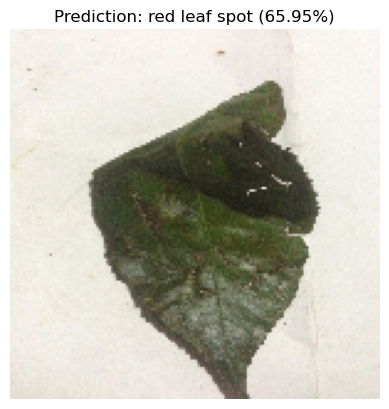

In [14]:
predict_image()


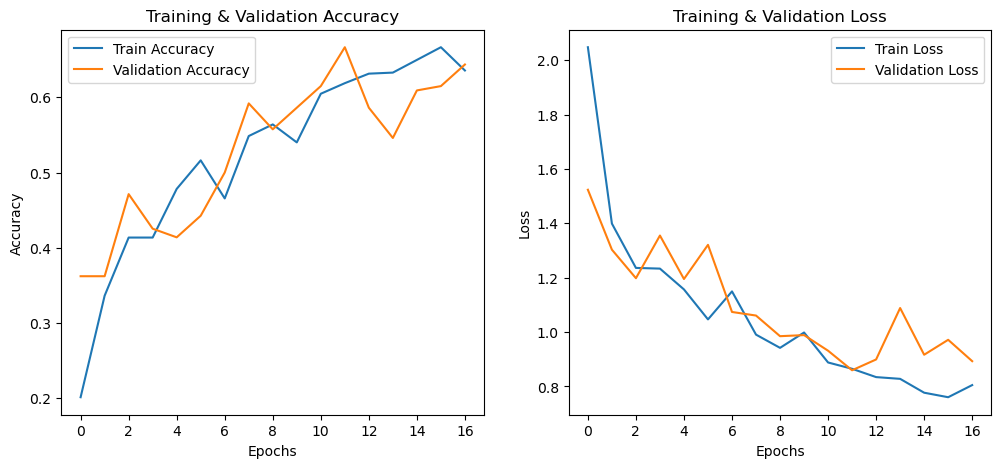

In [15]:

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step


<Figure size 800x600 with 0 Axes>

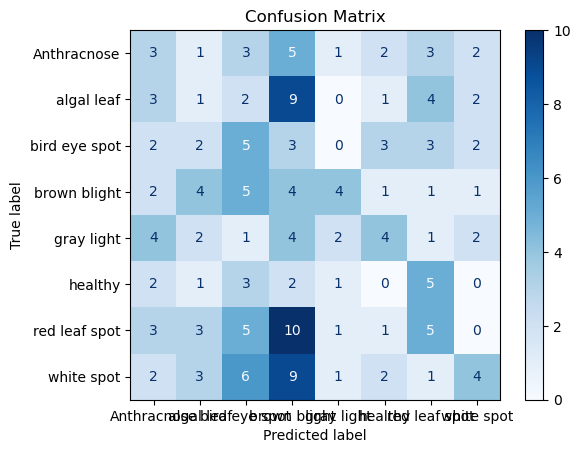

In [16]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get model predictions
y_true = valid_generator.classes
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


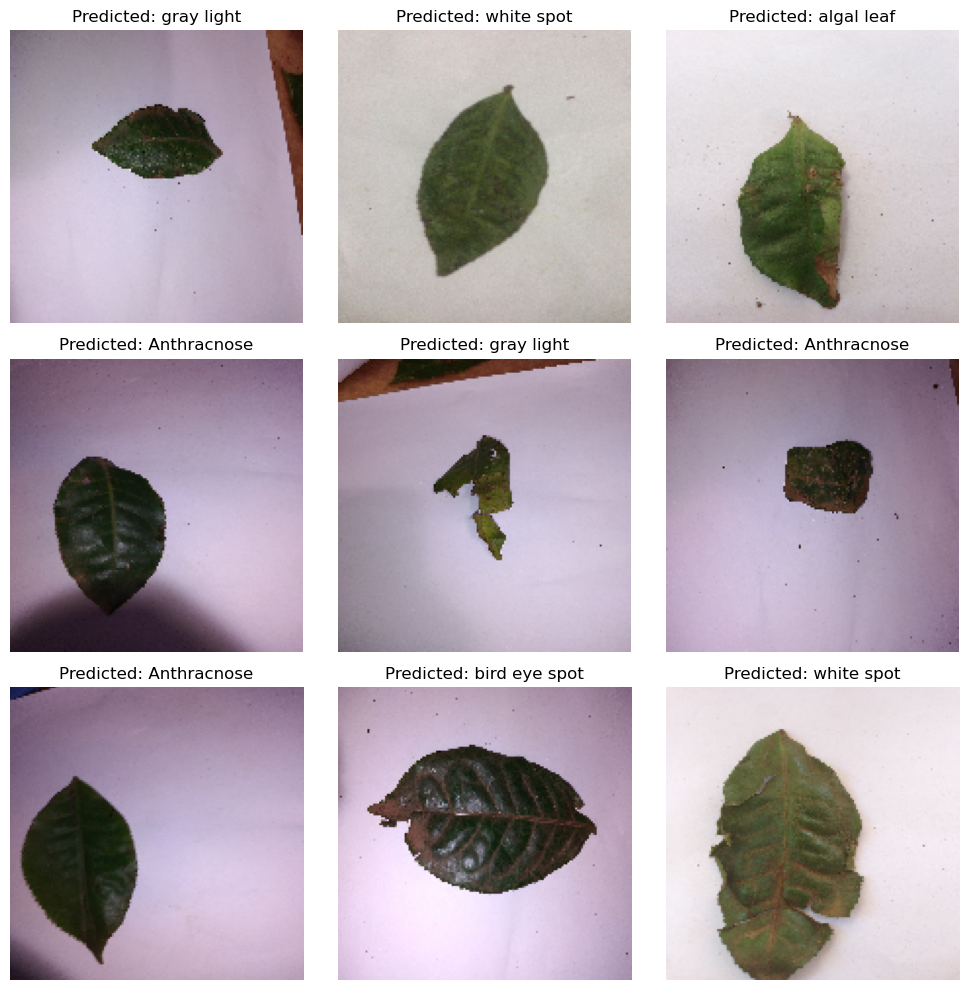

In [17]:

import random

# Select random images from validation set
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img_path = valid_generator.filepaths[random.randint(0, len(valid_generator.filepaths) - 1)]
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_label = class_labels[np.argmax(prediction)]

    ax.imshow(img)
    ax.set_title(f'Predicted: {predicted_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()
